* Random forest is a supervised ML algorithm based on ensemble learning, it is a type of learning where u join different type of 
  algorithms or same algorithm multiple times to form a more powerful prediction model.
* The Random Forest algorithm combines multiple algorithms for the same type that means the multiple decision tree resulting in   a forest of trees, hence the name of the random forest and this algorithm can b used for both regression and classification

* Random Forest has a variety of applications, such as recommendation engines, image classification & feature selection.
* It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases.
* It lies at the base of Boruta Algotrithm, which selects important features in a dataset. 

#### How the Random Forest Algorithm works

* Select the random sample from given dataset.
* Construct a decision tree for each sample and get a prediction result from each decision tree.
* Perform a vote for each predicted result if it is a classifier and do averaging if it is a regression.
* Select the prediction result with the most votes or average of a final predicted result.

#### Important Feature for Classification

Random Forest uses Gini importance or mean decrease in impurity(MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

#### Random Forest  vs Decision Trees

* Random Forest is a set of multiple decision trees.
* Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
* Decision trees are computationaly faster.
* Random forest is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

#### Random Forest as a Regressor

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [13]:
diabetes = datasets.load_diabetes()

In [14]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [18]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [19]:
X = diabetes.data
y = diabetes.target

X.shape, y.shape

((442, 10), (442,))

In [24]:
# Without dataframe we cannot plot pairplot

df = pd.DataFrame(X,columns = diabetes.feature_names)
df['target'] = y
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


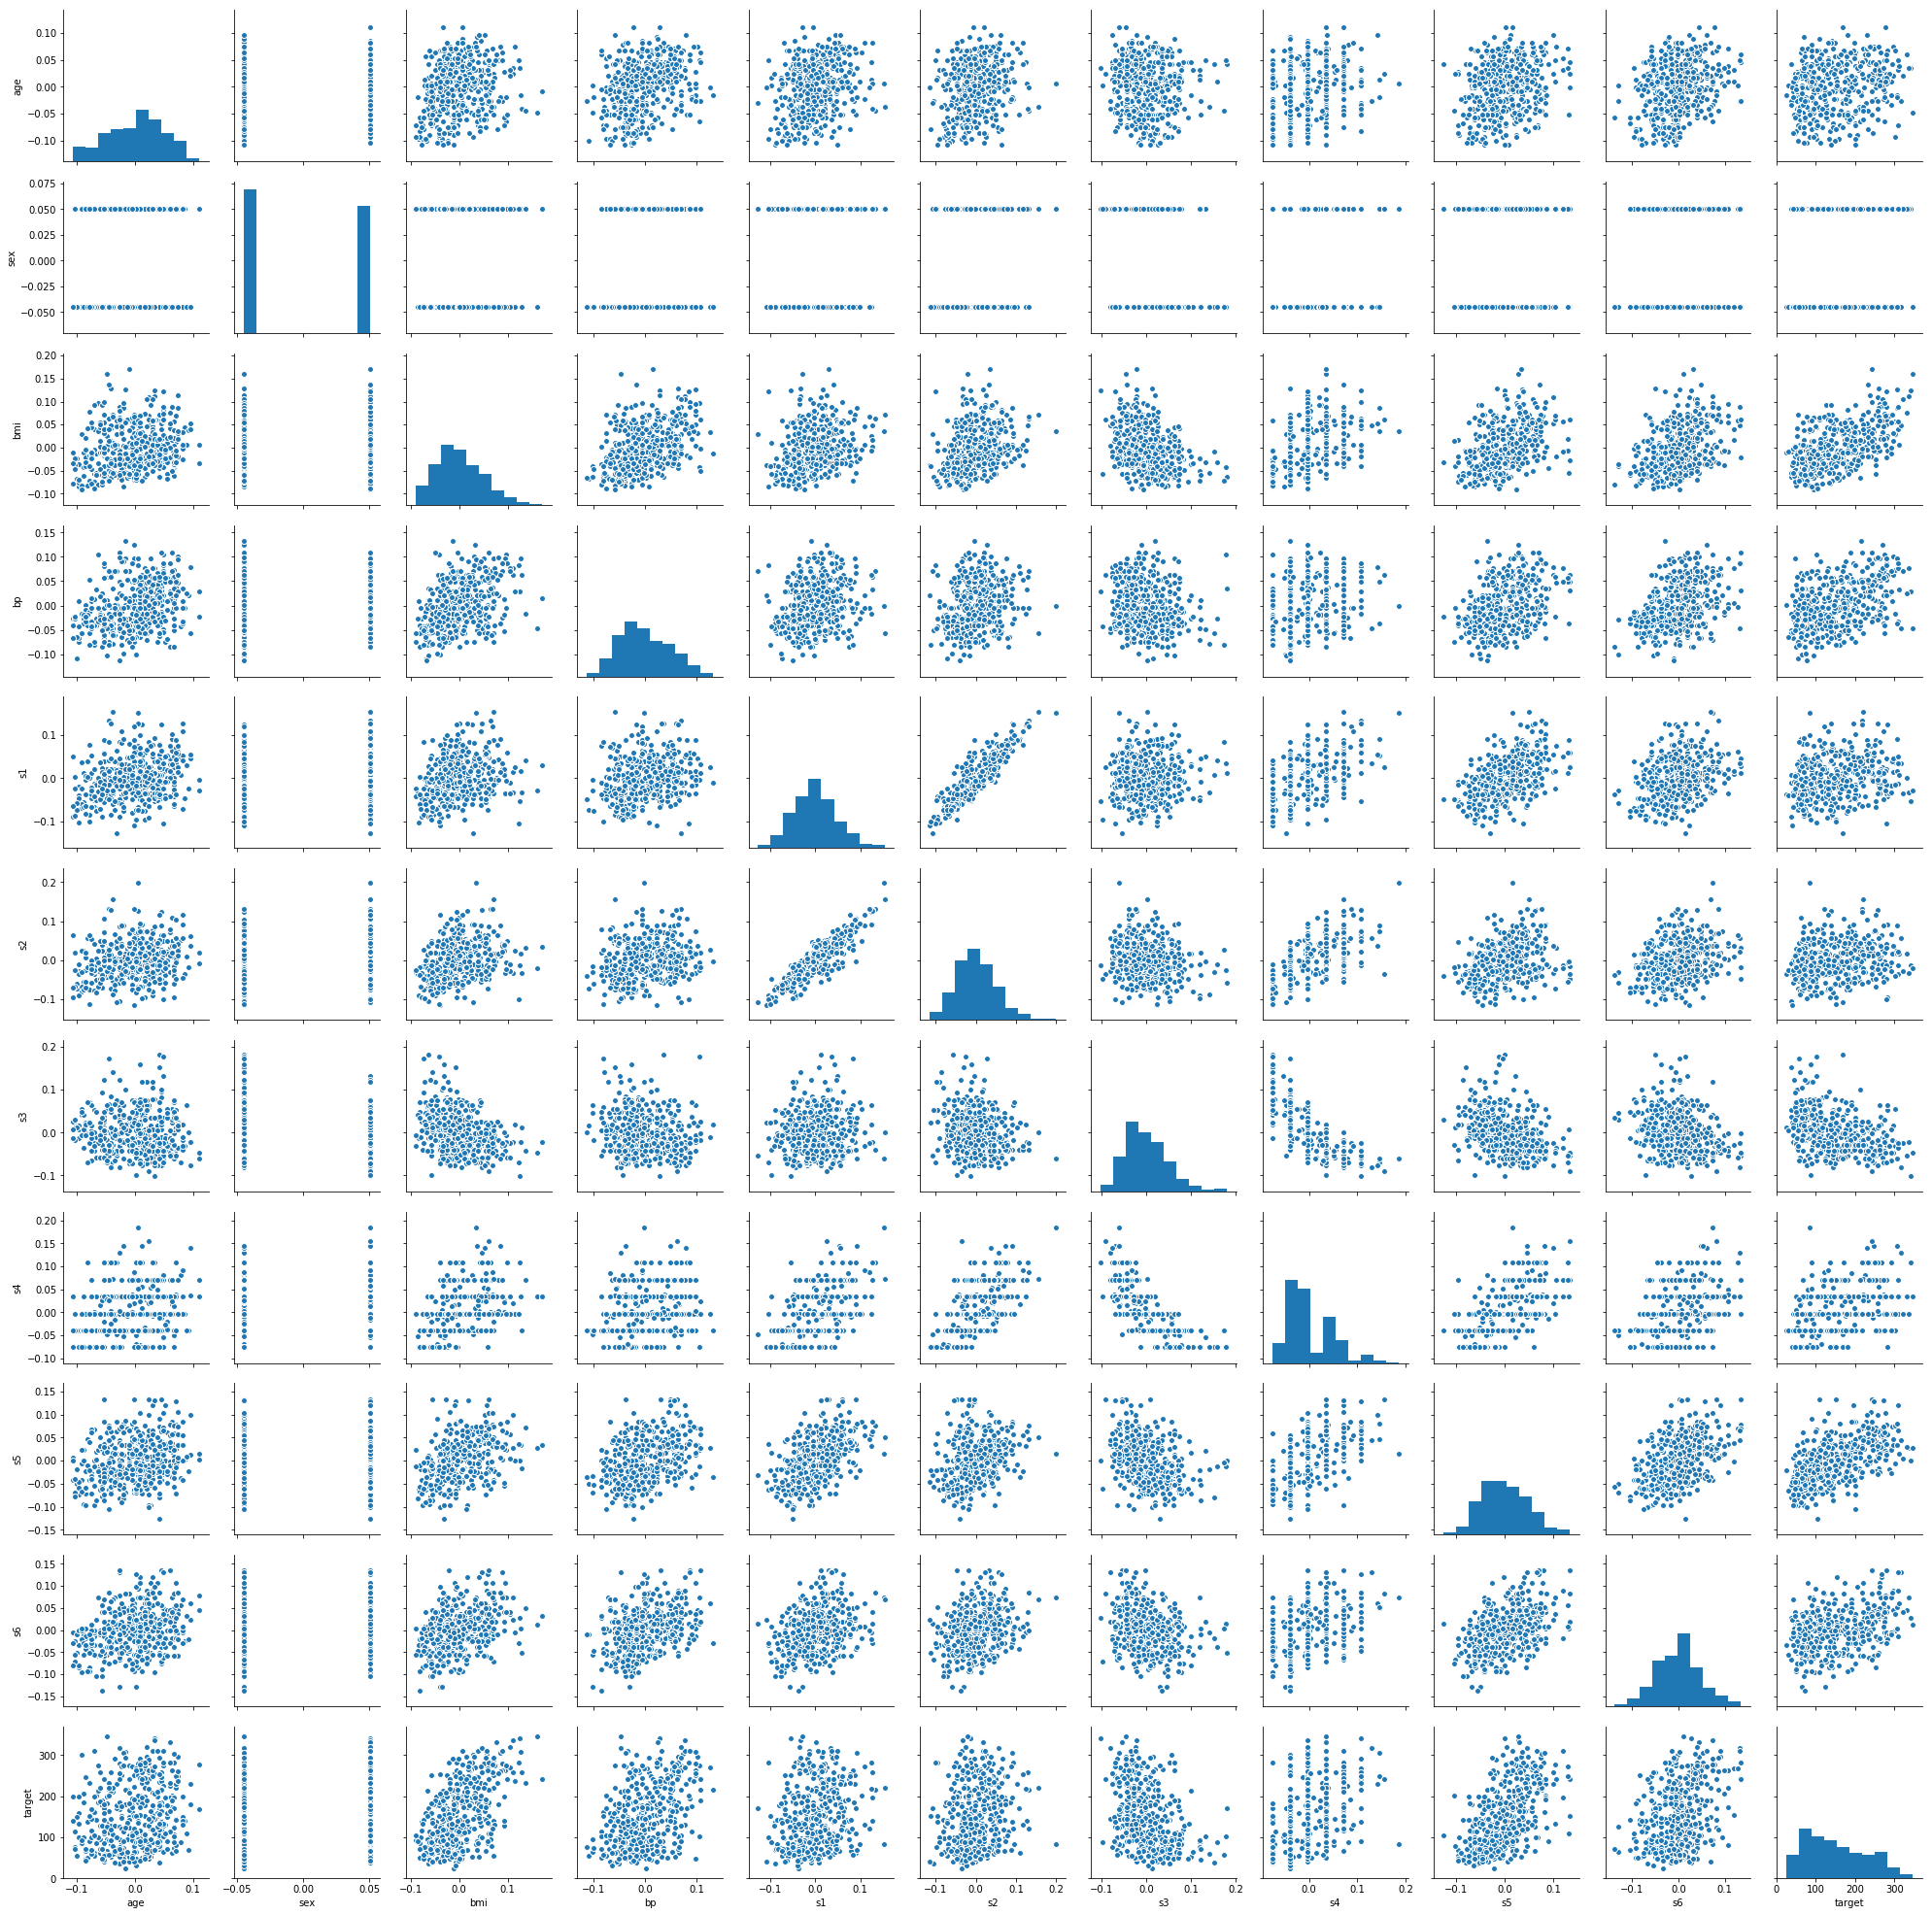

In [25]:
sns.pairplot(df)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [32]:
regressor = RandomForestRegressor(n_estimators=100, random_state = 42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

In [33]:
apdf = pd.DataFrame({'actual values':y_test,'predicted values': y_pred})
apdf.head()

,actual values,predicted values
0,219.0,151.98
1,70.0,178.98
2,202.0,138.10
3,230.0,252.14
4,111.0,114.77


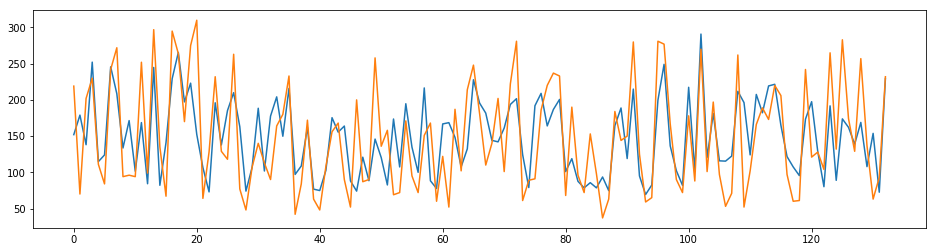

In [35]:
plt.figure(figsize=(16,4))
plt.plot(y_pred)
plt.plot(y_test)

In [36]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

# When compared with the error rate of Decision Tree(70.61) random forest error rate has reduced to 53.54

53.541079022159636

In [37]:
# Overall % of error rate reduced in between decision tree & random forest is 24%
(70.61 - 53.54)/70.61

0.2417504602747486

In [38]:
y_test.std()

#moreover now the error(53.54) is less than standard deviation(73.47) of actual y(i.e y_test) 
## So, we can say that the error in predicted data is less than sd of true value,it's a pretty good model.

73.47317715932746

#### Random Forest as a Classifier with iris data

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
iris = datasets.load_iris()

In [41]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [43]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [44]:
X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state = 1,stratify = y)

In [46]:
clf = RandomForestClassifier(n_estimators=100, random_state = 42)

In [47]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [48]:
y_pred =clf.predict(X_test)

In [49]:
print(metrics.accuracy_score(y_test,y_pred))

# when we comapre the accracy of RF(97.77%) classifier with Decision Tree(96.67%) classifier there is 1% accuracy increment in
# iris dataset

0.9777777777777777


In [50]:
mat = metrics.confusion_matrix(y_test,y_pred)
mat

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

Confusion Matrix :


Text(91.68,0.5,'True')

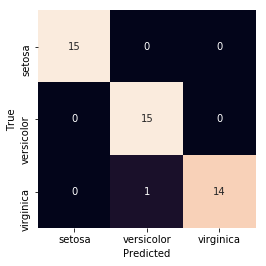

In [51]:
print('Confusion Matrix :')
sns.heatmap(mat, square=True, annot = True,fmt = 'd', cbar = False,xticklabels=iris.target_names,yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')

# fmt = 'd' (format is = decimal)
# cbar (colorbar)

In [55]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.94      1.00      0.97        15
          2       1.00      0.93      0.97        15

avg / total       0.98      0.98      0.98        45



In [56]:
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble.forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=10)
 |      The number of trees in the forest.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |      Note: this parameter is tree-specific.
 |  
 |  max_features : int, f

In [57]:
clf. feature_importances_

# from this feature_importances_ we could able to find important features in dataset
# petal length and petal width are important features in iris data

array([0.1160593 , 0.03098375, 0.43034957, 0.42260737])

In [58]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# RF is considered as the highly accurate and robust method because of the no. of decision tress participating in the process.
# It doesn't suffer from overfitting problem the main reason is that it takes average of all predictions which cancels the bias.
# It can also handle missing values using median values to replace continuous variables and computing proximity weighted avg for
# missing values.
# Can get relative feature_importance_ which helps in selecting the most contributing features for the classifier   